In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt


from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler, OneHotEncoder,normalize
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import silhouette_score
from sklearn import metrics

from sklearn.preprocessing import StandardScaler

from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:

os.environ["DATASET_DIRECTORY"] = "/content/datasets"
os.environ['KAGGLE_CONFIG_DIR'] = "/content/drive/MyDrive/Colab Notebooks/input"

In [ ]:
!kaggle datasets download -d bilalelebi/trendyol-product-dataset

100% 76.6M/76.6M [00:01<00:00, 98.3MB/s]
100% 76.6M/76.6M [00:01<00:00, 76.5MB/s]


In [ ]:
!unzip \*.zip  && rm *.zip

Archive:  trendyol-product-dataset.zip
  inflating: prepared_all_products.csv  


In [ ]:
df = pd.read_csv("prepared_all_products.csv",index_col = 0)
df.head(20)

,product_id,title,price,categories,merchant_name,merchant_url,merchant_id,merchant_followers,ratings_summary,average_rating,comment_count,rating_count,comments,questions_answers,Metadata
product_link,,,,,,,,,,,,,,,
https://www.trendyol.com/yikamaks/gogus-ucu-kapatici-ve-diklestirici-hayalet-sutyen-l-xl-p-251019545,251019545,Yıkamaks Göğüs Ucu Kapatıcı Ve Dikleştirici Ha...,38.70,"['Kadın', 'Giyim', 'İç Giyim', 'İç Giyim Akses...",MC Store,https://www.trendyol.com/magaza/mc-store-m-235031,235031,1030,"[{'rate': 5, 'count': 646, 'commentCount': 337...",3.67,814,1375,[{'comment': 'Güzel alınabilir en büyük bedeni...,"[{'question': 'Merhaba, 75 kullanıyorum. Hangi...","[{""Renk"": ""Bej""}]"
https://www.trendyol.com/nikamu/silikon-gogus-ucu-kapatici-kadin-ten-meme-ucu-kapatici-kadin-ic-giyim-kapatici-gogus-ucu-bandi-p-434878312,434878312,NikaMu Silikon Göğüs Ucu Kapatıcı Kadın Ten Me...,19.99,"['Kadın', 'Giyim', 'İç Giyim', 'İç Giyim Akses...",NikaMu,https://www.trendyol.com/magaza/nikamu-m-678516,678516,4490,"[{'rate': 5, 'count': 161, 'commentCount': 104...",4.59,142,215,[{'comment': 'Hem uygun fiyatlı hem de çok güz...,"[{'question': 'merhabalar tek kullanik mi ?',...","[{""Renk"": ""Bej""}]"
https://www.trendyol.com/hakke/kruvaze-yaka-trenckot-p-49622632?advertItems=eyJhZHZlcnRJZCI6ImNkNmUzNzJmLTU0ZGItNGFmYS04YzIwLWVhODJkM2FhODhjZSIsInNvcnRpbmdTY29yZSI6MC4xMDA1OTU0Mjg5MDM2NDk0LCJhZFNjb3JlIjowLjE3MDUwMDcyNjk1NTMzOCwiYWRTY29yZXMiOnsiMSI6MC4xNzA1MDA3MjY5NTUzMzgsIjIiOjAuMTkyNzQ5MDk3NjI0MDM5OX0sImNwYyI6MC41OSwibWluQ3BjIjowLjAxLCJlQ3BjIjowLjUzNTc1ODExOTAwNjQwNjYsImFkdmVydFNsb3QiOjEsIm9yZGVyIjoyLCJhdHRyaWJ1dGVzIjoiIn0=,49622632,HAKKE Kruvaze Yaka Trençkot 20mtegk1955trn00,269.90,"['Kadın', 'Giyim', 'Pardesü Trençkot', 'Trençk...",HAKKE,https://www.trendyol.com/magaza/hakke-m-134068,134068,223570,"[{'rate': 5, 'count': 6320, 'commentCount': 46...",3.76,9971,13185,[{'comment': '1.55 47 kiloyum en küçük bedenin...,[{'question': 'Merhabalar 170 boyunda 55 kıloy...,"[{""Materyal"": ""Polyester""}, {""Astar Durumu"": ""..."
https://www.trendyol.com/papatya/kadin-lazer-kesim-dikissiz-esnek-iz-yapmayan-toparlayici-ter-emen-6-li-6-adet-kulot-p-329852096,329852096,Papatya Kadın Lazer Kesim Dikişsiz Esnek Iz Ya...,90.40,"['Kadın', 'Giyim', 'İç Giyim', 'Külot', 'Papat...",LIDEBAZE,https://www.trendyol.com/magaza/lidebaze-m-282080,282080,22470,"[{'rate': 5, 'count': 339, 'commentCount': 217...",3.61,486,696,"[{'comment': 'normal fazla beğenmedim', 'rate'...","[{'question': 'beden tablosu yok mu', 'merchan...","[{""Renk"": ""Siyah""}, {""Parça Sayısı"": ""6""}, {""B..."
https://www.trendyol.com/voven/kadin-siyah-yuksek-bel-toparlayici-tayt-p-160146962,160146962,Voven Kadın Siyah Yüksek Bel Toparlayıcı Tayt ...,59.98,"['Kadın', 'Giyim', 'Tayt']",Biavsi,https://www.trendyol.com/magaza/biavsi-m-138325,138325,21429,"[{'rate': 5, 'count': 7809, 'commentCount': 47...",3.67,10511,15745,"[{'comment': 'rahat tam beden', 'rate': 5, 'da...",[{'question': '1.64 boy 64 kilo hangi beden al...,"[{""Materyal"": ""Polyester""}, {""Kalıp"": ""Slim Fi..."
https://www.trendyol.com/mocchi/rossi-keten-palazzo-kadin-takim-elbise-p-679663101?advertItems=eyJhZHZlcnRJZCI6IjJmYjk1Mzk0LTg1M2ItNDJmYy05YTc4LTc5NjNkZjc4MWI2NyIsInNvcnRpbmdTY29yZSI6MC4wOTEzNDcxNDg3NjI4MTY4LCJhZFNjb3JlIjowLjExNzExMTcyOTE4MzA5ODQ1LCJhZFNjb3JlcyI6eyIxIjowLjExNzExMTcyOTE4MzA5ODQ1LCIyIjowLjA2MjE3NTY4Njc0MjAwNzAwNX0sImNwYyI6MC43OCwibWluQ3BjIjowLjAxLCJlQ3BjIjowLjcxNTU3ODMyODQyMDY1ODksImFkdmVydFNsb3QiOjIsIm9yZGVyIjo1LCJhdHRyaWJ1dGVzIjoiIn0=,679663101,MOCCHI Rossi Keten Palazzo Kadın Takım Elbise ...,1050.00,"['Kadın', 'Giyim', 'Takımlar']",MOCCHI,https://www.trendyol.com/magaza/mocchi-m-547002,547002,12493,"[{'rate': 5, 'count': 1, 'commentCount': 1}, {...",5.00,1,1,[{'comment': 'Büyük geldiği için iade değiştir...,[{'question': 'oreulia?tu calcalke ikideba?'...,"[{""Kalıp"": ""Oversize""}, {""Kumaş Tipi"": ""Dokuma..."
https://www.trendyol.com/tutku/6-li-paket-cok-renkli-fashion-girl-kadin-slip-kulot-p-

In [ ]:
df.columns

Index(['product_id', 'title', 'price', 'categories', 'merchant_name',
       'merchant_url', 'merchant_id', 'merchant_followers', 'ratings_summary',
       'average_rating', 'comment_count', 'rating_count', 'comments',
       'questions_answers', 'Metadata'],
      dtype='object')

In [ ]:

df.drop(["product_id","merchant_url","merchant_id","comments",	"questions_answers"], axis=1, inplace=True)
df.head()


,title,price,categories,merchant_name,merchant_followers,ratings_summary,average_rating,comment_count,rating_count,Metadata
product_link,,,,,,,,,,
https://www.trendyol.com/yikamaks/gogus-ucu-kapatici-ve-diklestirici-hayalet-sutyen-l-xl-p-251019545,Yıkamaks Göğüs Ucu Kapatıcı Ve Dikleştirici Ha...,38.70,"['Kadın', 'Giyim', 'İç Giyim', 'İç Giyim Akses...",MC Store,1030,"[{'rate': 5, 'count': 646, 'commentCount': 337...",3.67,814,1375,"[{""Renk"": ""Bej""}]"
https://www.trendyol.com/nikamu/silikon-gogus-ucu-kapatici-kadin-ten-meme-ucu-kapatici-kadin-ic-giyim-kapatici-gogus-ucu-bandi-p-434878312,NikaMu Silikon Göğüs Ucu Kapatıcı Kadın Ten Me...,19.99,"['Kadın', 'Giyim', 'İç Giyim', 'İç Giyim Akses...",NikaMu,4490,"[{'rate': 5, 'count': 161, 'commentCount': 104...",4.59,142,215,"[{""Renk"": ""Bej""}]"
https://www.trendyol.com/hakke/kruvaze-yaka-trenckot-p-49622632?advertItems=eyJhZHZlcnRJZCI6ImNkNmUzNzJmLTU0ZGItNGFmYS04YzIwLWVhODJkM2FhODhjZSIsInNvcnRpbmdTY29yZSI6MC4xMDA1OTU0Mjg5MDM2NDk0LCJhZFNjb3JlIjowLjE3MDUwMDcyNjk1NTMzOCwiYWRTY29yZXMiOnsiMSI6MC4xNzA1MDA3MjY5NTUzMzgsIjIiOjAuMTkyNzQ5MDk3NjI0MDM5OX0sImNwYyI6MC41OSwibWluQ3BjIjowLjAxLCJlQ3BjIjowLjUzNTc1ODExOTAwNjQwNjYsImFkdmVydFNsb3QiOjEsIm9yZGVyIjoyLCJhdHRyaWJ1dGVzIjoiIn0=,HAKKE Kruvaze Yaka Trençkot 20mtegk1955trn00,269.90,"['Kadın', 'Giyim', 'Pardesü Trençkot', 'Trençk...",HAKKE,223570,"[{'rate': 5, 'count': 6320, 'commentCount': 46...",3.76,9971,13185,"[{""Materyal"": ""Polyester""}, {""Astar Durumu"": ""..."
https://www.trendyol.com/papatya/kadin-lazer-kesim-dikissiz-esnek-iz-yapmayan-toparlayici-ter-emen-6-li-6-adet-kulot-p-329852096,Papatya Kadın Lazer Kesim Dikişsiz Esnek Iz Ya...,90.40,"['Kadın', 'Giyim', 'İç Giyim', 'Külot', 'Papat...",LIDEBAZE,22470,"[{'rate': 5, 'count': 339, 'commentCount': 217...",3.61,486,696,"[{""Renk"": ""Siyah""}, {""Parça Sayısı"": ""6""}, {""B..."
https://www.trendyol.com/voven/kadin-siyah-yuksek-bel-toparlayici-tayt-p-160146962,Voven Kadın Siyah Yüksek Bel Toparlayıcı Tayt ...,59.98,"['Kadın', 'Giyim', 'Tayt']",Biavsi,21429,"[{'rate': 5, 'count': 7809, 'commentCount': 47...",3.67,10511,15745,"[{""Materyal"": ""Polyester""}, {""Kalıp"": ""Slim Fi..."


In [ ]:

df.drop(["Metadata"], axis=1, inplace=True)
df.head()


,title,price,categories,merchant_name,merchant_followers,ratings_summary,average_rating,comment_count,rating_count
0,Yıkamaks Göğüs Ucu Kapatıcı Ve Dikleştirici Ha...,38.70,"['Kadın', 'Giyim', 'İç Giyim', 'İç Giyim Akses...",MC Store,1030,"[{'rate': 5, 'count': 646, 'commentCount': 337...",3.67,814,1375
1,NikaMu Silikon Göğüs Ucu Kapatıcı Kadın Ten Me...,19.99,"['Kadın', 'Giyim', 'İç Giyim', 'İç Giyim Akses...",NikaMu,4490,"[{'rate': 5, 'count': 161, 'commentCount': 104...",4.59,142,215
2,HAKKE Kruvaze Yaka Trençkot 20mtegk1955trn00,269.90,"['Kadın', 'Giyim', 'Pardesü Trençkot', 'Trençk...",HAKKE,223570,"[{'rate': 5, 'count': 6320, 'commentCount': 46...",3.76,9971,13185
3,Papatya Kadın Lazer Kesim Dikişsiz Esnek Iz Ya...,90.40,"['Kadın', 'Giyim', 'İç Giyim', 'Külot', 'Papat...",LIDEBAZE,22470,"[{'rate': 5, 'count': 339, 'commentCount': 217...",3.61,486,696
4,Voven Kadın Siyah Yüksek Bel Toparlayıcı Tayt ...,59.98,"['Kadın', 'Giyim', 'Tayt']",Biavsi,21429,"[{'rate': 5, 'count': 7809, 'commentCount': 47...",3.67,10511,15745


In [ ]:
df.isnull().sum()

title                 0
price                 0
categories            0
merchant_name         0
merchant_followers    0
ratings_summary       0
average_rating        0
comment_count         0
rating_count          0
dtype: int64

In [ ]:
df.shape

(32981, 9)

In [ ]:

df.reset_index(drop=True, inplace=True)
df.head()


,title,price,categories,merchant_name,merchant_followers,ratings_summary,average_rating,comment_count,rating_count
0,Yıkamaks Göğüs Ucu Kapatıcı Ve Dikleştirici Ha...,38.70,"['Kadın', 'Giyim', 'İç Giyim', 'İç Giyim Akses...",MC Store,1030,"[{'rate': 5, 'count': 646, 'commentCount': 337...",3.67,814,1375
1,NikaMu Silikon Göğüs Ucu Kapatıcı Kadın Ten Me...,19.99,"['Kadın', 'Giyim', 'İç Giyim', 'İç Giyim Akses...",NikaMu,4490,"[{'rate': 5, 'count': 161, 'commentCount': 104...",4.59,142,215
2,HAKKE Kruvaze Yaka Trençkot 20mtegk1955trn00,269.90,"['Kadın', 'Giyim', 'Pardesü Trençkot', 'Trençk...",HAKKE,223570,"[{'rate': 5, 'count': 6320, 'commentCount': 46...",3.76,9971,13185
3,Papatya Kadın Lazer Kesim Dikişsiz Esnek Iz Ya...,90.40,"['Kadın', 'Giyim', 'İç Giyim', 'Külot', 'Papat...",LIDEBAZE,22470,"[{'rate': 5, 'count': 339, 'commentCount': 217...",3.61,486,696
4,Voven Kadın Siyah Yüksek Bel Toparlayıcı Tayt ...,59.98,"['Kadın', 'Giyim', 'Tayt']",Biavsi,21429,"[{'rate': 5, 'count': 7809, 'commentCount': 47...",3.67,10511,15745


In [ ]:

from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

object_cols = df.select_dtypes(include='object').columns

for col in object_cols:
    df[col] = le.fit_transform(df[col])

df.head()


,title,price,categories,merchant_name,merchant_followers,ratings_summary,average_rating,comment_count,rating_count
0,25350,38.70,4877,4411,1030,16903,3.67,814,1375
1,16161,19.99,4877,5314,4490,4609,4.59,142,215
2,9893,269.90,4664,3265,223570,16765,3.76,9971,13185
3,17265,90.40,4808,4112,22470,11158,3.61,486,696
4,24482,59.98,4734,1217,21429,18574,3.67,10511,15745


In [ ]:
scaler = StandardScaler()
df_std = scaler.fit_transform(df)
df_std

array([[ 1.34152497, -0.22183695,  0.30695508, ..., -0.03894221,
         0.17249241,  0.22399666],
       [ 0.22372885, -0.22431474,  0.30695508, ...,  0.50080791,
        -0.16053597, -0.16665431],
       [-0.53874215, -0.19121874,  0.22433298, ...,  0.01385943,
         4.71049958,  4.20122763],
       ...,
       [-1.11436641, -0.18392176,  1.03115912, ..., -2.19207582,
        -0.23090803, -0.23905945],
       [-1.11448805, -0.18392176,  1.03115912, ..., -2.19207582,
        -0.23090803, -0.23905945],
       [-1.11473134, -0.18392176,  1.03115912, ...,  0.74134872,
        -0.23041246, -0.23838591]])

In [ ]:
# Normalleştirme, gerçek değerli sayısal niteliklerin 0 ve 1 aralığına yeniden ölçeklendirilmesi anlamına gelir.
# Uzaklık ölçümlerinde kullanılan değerler gibi değerlerin büyüklüğüne dayanan bir model için girdi niteliklerini ölçeklendirmek faydalıdır.
norm=normalize(df_std)
norm

array([[ 0.07957945, -0.03008616,  0.19279879, ..., -0.14112775,
        -0.07962447,  0.07962616],
       [ 0.0319869 ,  0.02438795, -0.06897635, ..., -0.04505707,
        -0.03201232,  0.03201169],
       [ 0.0378034 ,  0.05038005,  0.09158709, ..., -0.08616071,
        -0.03784191,  0.03784215],
       ...,
       [-0.4295607 , -0.05452941, -0.17730507, ..., -0.18740083,
         0.43108465, -0.43108553],
       [-0.39365538, -0.35075096,  0.18255267, ..., -0.17173672,
         0.39450031, -0.39449851],
       [-0.34101384, -0.06190034, -0.14075655, ..., -0.04648523,
         0.34170902, -0.34171043]])

In [ ]:
# Employ PCA to find a subset of components, which explain the variance in the data.
pca = PCA()


In [ ]:
pca.fit(df_std)

PCA()

In [ ]:
pca.explained_variance_ratio_

array([0.23693999, 0.17371471, 0.15334856, 0.12118037, 0.10491378,
       0.09057277, 0.06729532, 0.0517667 , 0.0002678 ])

Text(0, 0.5, 'Cumulative Explained Variance')

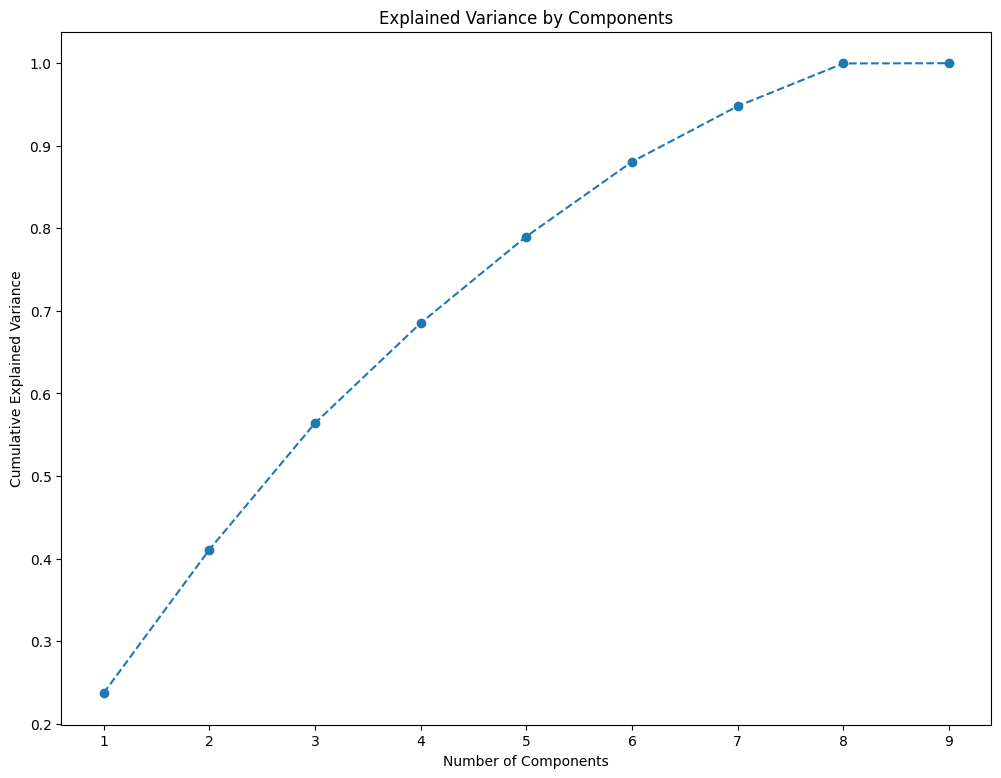

In [ ]:
# Plot the cumulative variance explained by total number of components.
# On this graph we choose the subset of components we want to keep.
# Generally, we want to keep around 80 % of the explained variance.
plt.figure(figsize = (12,9))
plt.plot(range(1,10), pca.explained_variance_ratio_.cumsum(), marker = 'o', linestyle = '--')
plt.title('Explained Variance by Components')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')

In [ ]:
pca = PCA(n_components = 5)

In [ ]:
pca.fit(df_std)

PCA(n_components=5)

# Sonuç

In [ ]:
# Here we discucss the results from the PCA.
# The components attribute shows the loadings of each component on each of the seven original features.
# The loadings are the correlations between the components and the original features.
pca.components_

array([[ 0.05682337, -0.13531188,  0.10360182,  0.05815844,  0.18658452,
         0.25775611,  0.27940008,  0.62611181,  0.62690801],
       [-0.16177369,  0.30757828, -0.25187323, -0.12471617, -0.05439361,
        -0.53765054, -0.56106483,  0.31227029,  0.30967303],
       [ 0.68128339,  0.06788754,  0.04631849,  0.68918216, -0.00876513,
        -0.17730864, -0.14945278,  0.01228395,  0.0111604 ],
       [ 0.00341572,  0.52571563, -0.66693549,  0.11125143,  0.37916204,
         0.27509167,  0.20395461, -0.05111542, -0.05274505],
       [ 0.04704665,  0.34575754, -0.08731184,  0.00907376, -0.87694926,
         0.25020461,  0.1544849 ,  0.08586212,  0.08747808]])

In [ ]:
df_pca_comp = pd.DataFrame(data = pca.components_,
                           columns = df.columns.values,
                           index = ['Component 1', 'Component 2', 'Component 3', 'Component 4',
                                    'Component 5'])
df_pca_comp

,title,price,categories,merchant_name,merchant_followers,ratings_summary,average_rating,comment_count,rating_count
Component 1,0.056823,-0.135312,0.103602,0.058158,0.186585,0.257756,0.279400,0.626112,0.626908
Component 2,-0.161774,0.307578,-0.251873,-0.124716,-0.054394,-0.537651,-0.561065,0.312270,0.309673
Component 3,0.681283,0.067888,0.046318,0.689182,-0.008765,-0.177309,-0.149453,0.012284,0.011160
Component 4,0.003416,0.525716,-0.666935,0.111251,0.379162,0.275092,0.203955,-0.051115,-0.052745
Component 5,0.047047,0.345758,-0.087312,0.009074,-0.876949,0.250205,0.154485,0.085862,0.087478


([<matplotlib.axis.YTick at 0x7aa3e7f8c460>,
 [Text(0, 0, 'Component 1'),
  Text(0, 1, 'Component 2'),
  Text(0, 2, 'Component 3'),
  Text(0, 3, 'Component 4'),
  Text(0, 4, 'Component 5')])

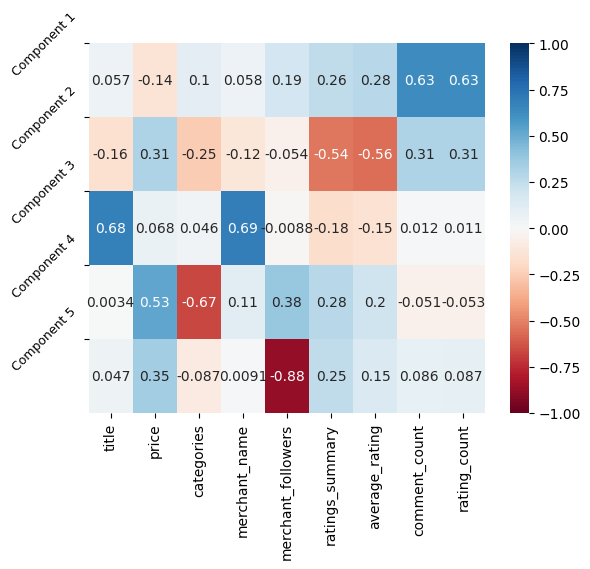

In [ ]:
# Heat Map for Principal Components against original features. Again we use the RdBu color scheme and set borders to -1 and 1.
sns.heatmap(df_pca_comp,
            vmin = -1,
            vmax = 1,
            cmap = 'RdBu',
            annot = True)
plt.yticks([0, 1, 2, 3, 4],
           ['Component 1', 'Component 2', 'Component 3', 'Component 4','Component 5'],
           rotation = 45,
           fontsize = 9)

# K-means clustering with PCA

In [ ]:
scores_pca = pca.transform(df_std)

In [ ]:
# We fit K means using the transformed data from the PCA.
wcss = []
for i in range(1,11):
    kmeans_pca = KMeans(n_clusters = i, init = 'k-means++', random_state = 42,n_init=10)
    kmeans_pca.fit(scores_pca)
    wcss.append(kmeans_pca.inertia_)

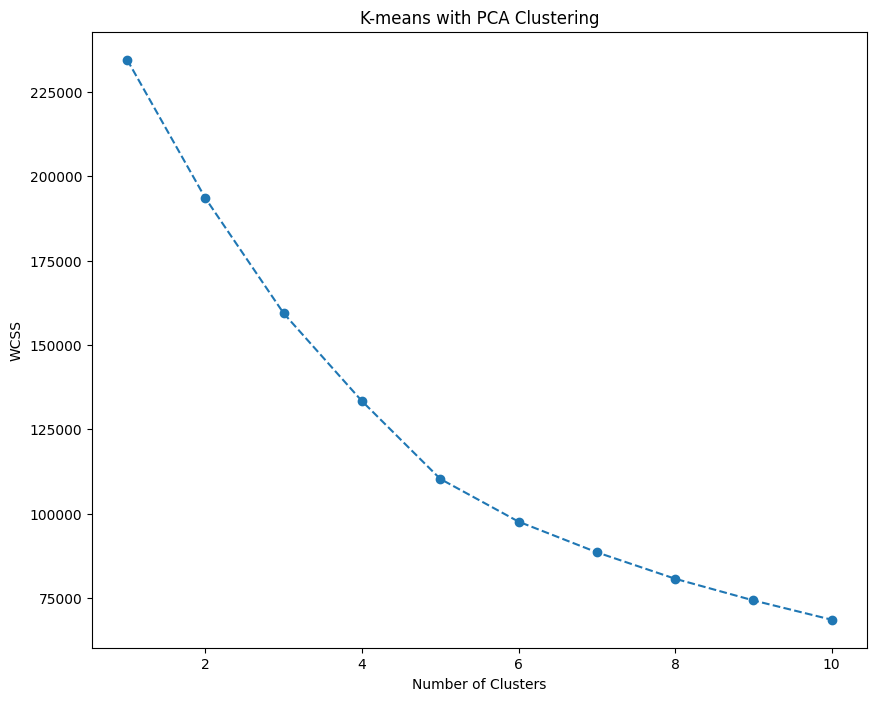

In [ ]:
# Plot the Within Cluster Sum of Squares for the K-means PCA model. Here we make a decission about the number of clusters.
# Again it looks like four is the best option.
plt.figure(figsize = (10,8))
plt.plot(range(1, 11), wcss, marker = 'o', linestyle = '--')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.title('K-means with PCA Clustering')
plt.show()

In [ ]:
# We have chosen four clusters, so we run K-means with number of clusters equals four.
# Same initializer and random state as before.
kmeans_pca = KMeans(n_clusters = 5, init = 'k-means++', random_state = 42)

In [ ]:
# We fit our data with the k-means pca model
kmeans_pca.fit(scores_pca)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=5, random_state=42)

# K-means clustering with PCA Results

In [ ]:
# We create a new data frame with the original features and add the PCA scores and assigned clusters.
df_segm_pca_kmeans = pd.concat([df.reset_index(drop = True), pd.DataFrame(scores_pca)], axis = 1)
df_segm_pca_kmeans.columns.values[-5: ] = ['Component 1', 'Component 2', 'Component 3', 'Component 4', 'Component 5']
# The last column we add contains the pca k-means clustering labels.
df_segm_pca_kmeans['Segment K-means PCA'] = kmeans_pca.labels_

In [ ]:
df_segm_pca_kmeans

,title,price,categories,merchant_name,merchant_followers,ratings_summary,average_rating,comment_count,rating_count,Component 1,Component 2,Component 3,Component 4,Component 5,Segment K-means PCA
0,25350,38.70,4877,4411,1030,16903,3.67,814,1375,0.644396,-0.890129,0.655461,-0.121664,0.606146,4
1,16161,19.99,4877,5314,4490,4609,4.59,142,215,-0.169016,-0.301342,0.370247,-0.437347,0.109418,4
2,9893,269.90,4664,3265,223570,16765,3.76,9971,13185,5.987557,2.087882,-0.845566,-0.249442,0.592822,0
3,17265,90.40,4808,4112,22470,11158,3.61,486,696,0.117230,-0.355120,0.055689,-0.309592,0.245354,4
4,24482,59.98,4734,1217,21429,18574,3.67,10511,15745,6.679834,2.158884,-0.207066,-0.627587,1.431467,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32976,24439,324.90,6800,7315,11334,0,0.00,0,0,-1.008407,1.096143,2.152127,-1.544483,-0.507734,1
32977,8163,19.99,6791,4426,379,2,1.00,1,1,-1.023794,1.218122,-0.061892,-1.589988,-0.500524,1
32978,5161,325.00,6744,6622,836,0,0.00,0,0,-1.166417,1.516612,0.367914,-1.581856,-0.586567,1
32979,5160,325.00,6744,6622,836,0,0.00,0,0,-1.166423,1.516632,0.367831,-1.581857,-0.586573,1


In [ ]:
# We calculate the means by segments.
df_segm_pca_kmeans_freq = df_segm_pca_kmeans.groupby(['Segment K-means PCA']).mean()
df_segm_pca_kmeans_freq

,title,price,categories,merchant_name,merchant_followers,ratings_summary,average_rating,comment_count,rating_count,Component 1,Component 2,Component 3,Component 4,Component 5
Segment K-means PCA,,,,,,,,,,,,,,
0,8499.862348,1225.889775,3906.994200,2726.054489,4.551616e+04,10108.795278,4.490163,424.776489,653.438608,0.059840,-0.205358,-1.099222,0.034107,0.239418
1,13594.042224,4825.929440,3397.670895,4432.249870,1.672180e+04,28.287924,0.198832,0.973936,1.451607,-1.328221,1.896804,0.441180,-0.448235,-0.255939
2,15365.571997,976.104618,3728.915063,5415.770405,1.267098e+06,10006.771068,4.388607,807.878567,1202.919708,1.173096,-0.536887,0.164455,1.758332,-3.426085
3,14780.481250,198.253562,4830.075000,5075.831250,4.203643e+05,6867.150000,4.466188,21203.850000,31322.931250,13.249932,6.034661,0.376598,-0.883604,0.726417
4,19863.804400,919.127932,4578.619087,6205.192822,4.340216e+04,9671.142814,4.489628,416.855459,644.274741,0.227028,-0.642648,0.796553,-0.026006,0.269492


In [ ]:
# Calculate the size of each cluster and its proportion to the entire data set.
df_segm_pca_kmeans_freq['N Obs'] = df_segm_pca_kmeans[['Segment K-means PCA','price']].groupby(['Segment K-means PCA']).count()
df_segm_pca_kmeans_freq['Prop Obs'] = df_segm_pca_kmeans_freq['N Obs'] / df_segm_pca_kmeans_freq['N Obs'].sum()
df_segm_pca_kmeans_freq = df_segm_pca_kmeans_freq.rename({0:'Hafif Beğeni Eğilimi',
                                                          1:'Düşük Beğenmem',
                                                          2:'Geniş Kategori Çeşitliliği',
                                                          3:'Az Bilinen Satıcı',
                                                          4:'Düşük Takipçili Satıcı'})
df_segm_pca_kmeans_freq

,title,price,categories,merchant_name,merchant_followers,ratings_summary,average_rating,comment_count,rating_count,Component 1,Component 2,Component 3,Component 4,Component 5,N Obs,Prop Obs
Segment K-means PCA,,,,,,,,,,,,,,,,
Hafif Beğeni Eğilimi,8499.862348,1225.889775,3906.994200,2726.054489,4.551616e+04,10108.795278,4.490163,424.776489,653.438608,0.059840,-0.205358,-1.099222,0.034107,0.239418,12241,0.371153
Düşük Beğenmem,13594.042224,4825.929440,3397.670895,4432.249870,1.672180e+04,28.287924,0.198832,0.973936,1.451607,-1.328221,1.896804,0.441180,-0.448235,-0.255939,5755,0.174494
Geniş Kategori Çeşitliliği,15365.571997,976.104618,3728.915063,5415.770405,1.267098e+06,10006.771068,4.388607,807.878567,1202.919708,1.173096,-0.536887,0.164455,1.758332,-3.426085,1507,0.045693
Az Bilinen Satıcı,14780.481250,198.253562,4830.075000,5075.831250,4.203643e+05,6867.150000,4.466188,21203.850000,31322.931250,13.249932,6.034661,0.376598,-0.883604,0.726417,160,0.004851
Düşük Takipçili Satıcı,19863.804400,919.127932,4578.619087,6205.192822,4.340216e+04,9671.142814,4.489628,416.855459,644.274741,0.227028,-0.642648,0.796553,-0.026006,0.269492,13318,0.403808


In [ ]:
df_segm_pca_kmeans['Legend'] = df_segm_pca_kmeans['Segment K-means PCA'].map(
                                                         {0:'Hafif Beğeni Eğilimi',
                                                          1:'Düşük Beğenmem',
                                                          2:'Geniş Kategori Çeşitliliği',
                                                          3:'Az Bilinen Satıcı',
                                                          4:'Düşük Takipçili Satıcı'})

<ipython-input-137-c01c96ed12bf>:9: UserWarning: 
The palette list has fewer values (4) than needed (5) and will cycle, which may produce an uninterpretable plot.
  sns.scatterplot(x='Component 5', y='Component 1', hue='Legend', data=df_segm_pca_kmeans, palette=['g', 'r', 'c', 'm'])


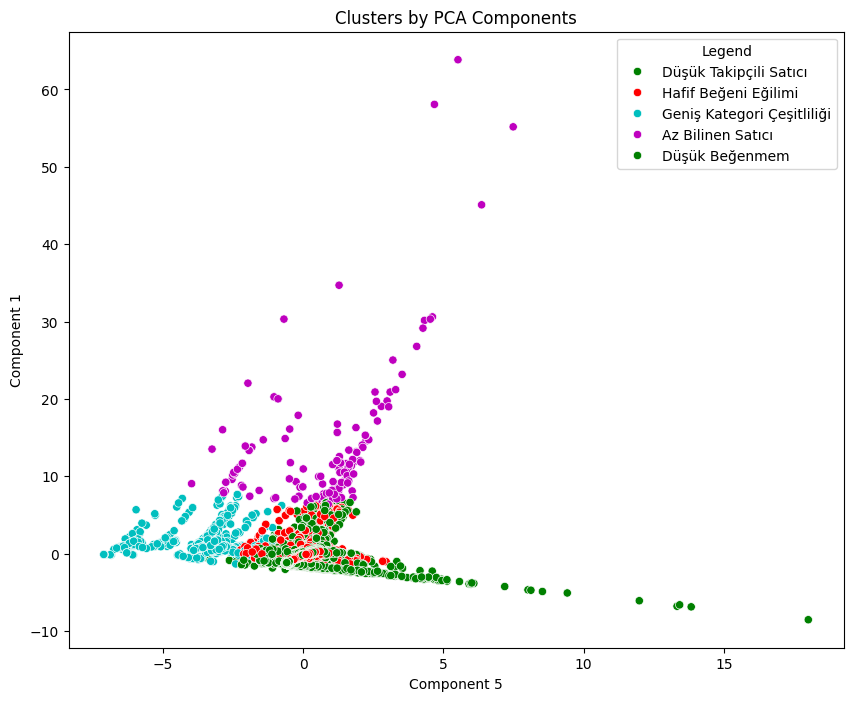

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Veri çerçevesi ve PCA bileşenlerini varsayıyoruz
# df_segm_pca_kmeans['Component 2'] ve df_segm_pca_kmeans['Component 1'] mevcut ve doğru
# df_segm_pca_kmeans['Legend'] sütunu da mevcut ve kategorik veri içeriyor

plt.figure(figsize = (10, 8))
sns.scatterplot(x='Component 5', y='Component 1', hue='Legend', data=df_segm_pca_kmeans, palette=['g', 'r', 'c', 'm'])
plt.title('Clusters by PCA Components')
plt.show()
